In [1]:
import torch as t
from torch import nn
from torch.autograd import Variable as V

In [9]:
class Linear(nn.Module):
    def __init__(self, in_features, out_features):
        super(Linear, self).__init__()
        self.w = nn.Parameter(t.randn(in_features, out_features))
        self.b = nn.Parameter(t.randn(out_features))
    
    def forward(self, x):
        x = x.mm(self.w)
        return x + self.b.expand_as(x)

In [10]:
layer = Linear(4,3)
input = V(t.randn(2,4))
output = layer(input)
output

tensor([[ 1.5670,  1.0476, -0.1698],
        [ 0.4003, -3.4776, -1.4337]], grad_fn=<AddBackward0>)

In [13]:
for name, parameter in layer.named_parameters():
    print(name, parameter)

w Parameter containing:
tensor([[-0.8134, -1.5706,  0.3828],
        [ 0.0461,  1.7018,  1.9067],
        [ 0.3470, -0.9184,  1.2992],
        [-0.0282, -0.5896, -0.1099]], requires_grad=True)
b Parameter containing:
tensor([ 0.6580, -0.1113,  0.8735], requires_grad=True)


In [14]:
class Perception(nn.Module):
    def __init__(self, in_features, hidden_features, out_features):
        nn.Module.__init__(self)
        self.layer1 = Linear(in_features, hidden_features)
        self.layer2 = Linear(hidden_features, out_features)
        
    def forward(self, x):
        x = self.layer1(x)
        x = t.sigmoid(x)
        return self.layer2(x)

In [15]:
perceptron = Perception(3,4,1)
for name, param in perceptron.named_parameters():
    print(name, param.size())

layer1.w torch.Size([3, 4])
layer1.b torch.Size([4])
layer2.w torch.Size([4, 1])
layer2.b torch.Size([1])


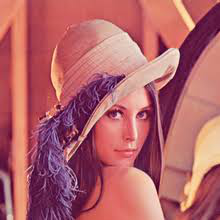

In [26]:
from PIL import Image
from torchvision.transforms import ToTensor,ToPILImage
to_tensor = ToTensor()
to_pil = ToPILImage()
lena = Image.open('C:/Users/studentx/Desktop/image/lenna.jpg')
lena

In [27]:
input = to_tensor(lena).unsqueeze(0)

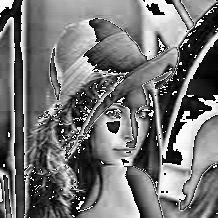

In [32]:
kernel = t.ones(3,3,3)/-27
kernel[1][1] = 1
conv = nn.Conv2d(1,3,(3,3,3), 1, bias=False)
conv.weight.data = kernel.view(1,3,3,3)
out = conv(V(input))
to_pil(out.data.squeeze(0))

In [33]:
pool = nn.AvgPool2d(2,2)
list(pool.parameters())

[]

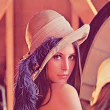

In [34]:
out = pool(V(input))
to_pil(out.data.squeeze(0))

In [35]:
input = V(t.randn(2,3))
linear = nn.Linear(3,4)
h = linear(input)
h

tensor([[-0.4947, -0.3874,  0.4513, -0.7568],
        [-0.2332,  0.7062,  0.2159, -1.2693]], grad_fn=<AddmmBackward>)

In [37]:
bn = nn.BatchNorm1d(4)
bn.weight.data = t.ones(4)*4
bn.bias.data = t.zeros(4)

bn_out = bn(h)
bn_out.mean(0), bn_out.var(0,unbiased=False)

(tensor([2.3842e-07, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        grad_fn=<MeanBackward2>),
 tensor([15.9906, 15.9995, 15.9885, 15.9976], grad_fn=<VarBackward1>))

In [38]:
dropout = nn.Dropout(0.5)
o = dropout(bn_out)
o

tensor([[-7.9977, -7.9999,  0.0000,  0.0000],
        [ 0.0000,  7.9999, -0.0000, -7.9994]], grad_fn=<MulBackward0>)

In [39]:
relu = nn.ReLU(inplace=True)
input = V(t.randn(2,3))
print(input)
output = relu(input)
print(output)

tensor([[ 1.3770, -0.3738, -0.3773],
        [-0.3839,  1.8921, -0.9439]])
tensor([[1.3770, 0.0000, 0.0000],
        [0.0000, 1.8921, 0.0000]])


In [40]:
net1 = nn.Sequential()
net1.add_module('conv',nn.Conv2d(3,3,3))
net1.add_module('batch_norm', nn.BatchNorm2d(3))
net1.add_module('activation layer', nn.ReLU())
print(net1)

Sequential(
  (conv): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1))
  (batch_norm): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (activation layer): ReLU()
)


In [41]:
net2 = nn.Sequential(
        nn.Conv2d(3,3,3),
        nn.BatchNorm2d(3),
        nn.ReLU()
)
print(net2)

Sequential(
  (0): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1))
  (1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
)


In [43]:
from collections import OrderedDict
net3 = nn.Sequential(OrderedDict([
    ('cov1',nn.Conv2d(3,3,3)),
    ('bn1', nn.BatchNorm2d(3)),
    ('relu1', nn.ReLU())
]))
print(net3)

Sequential(
  (cov1): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1))
  (bn1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
)


In [45]:
net1.conv, net2[0], net3.cov1

(Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1)),
 Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1)),
 Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1)))

In [48]:
input = V(t.rand(1,3,4,4))
output  = net1(input)
output = net2(input)
output = net3(input)
output = net3.relu1(net1.batch_norm(net1.conv(input)))

In [49]:
modellist = nn.ModuleList([nn.Linear(3,4), nn.ReLU(),nn.Linear(4,2)])
input = V(t.randn(1,3))
for model in modellist:
    input = model(input)

In [50]:
t.manual_seed(1000)
input = V(t.randn(2,3,4))
lstm = nn.LSTM(4,3,1)
h0 = V(t.randn(1,3,3))
c0 = V(t.randn(1,3,3))

out, hn = lstm(input, (h0,c0))
out

tensor([[[-0.3610, -0.1643,  0.1631],
         [-0.0613, -0.4937, -0.1642],
         [ 0.5080, -0.4175,  0.2502]],

        [[-0.0703, -0.0393, -0.0429],
         [ 0.2085, -0.3005, -0.2686],
         [ 0.1482, -0.4728,  0.1425]]], grad_fn=<StackBackward>)

In [53]:
t.manual_seed(1000)
input = V(t.randn(2,3,4))
lstm = nn.LSTMCell(4,3)
hx = V(t.randn(3,3))
cx = V(t.randn(3,3))
out = []
for i in input:
    hx,cx = lstm(i,(hx,cx))
    out.append(hx)
t.stack(out)

tensor([[[-0.3610, -0.1643,  0.1631],
         [-0.0613, -0.4937, -0.1642],
         [ 0.5080, -0.4175,  0.2502]],

        [[-0.0703, -0.0393, -0.0429],
         [ 0.2085, -0.3005, -0.2686],
         [ 0.1482, -0.4728,  0.1425]]], grad_fn=<StackBackward>)

In [55]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3,6,5),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(6,16,5),
            nn.ReLU(0),
            nn.MaxPool2d(2,2)
        )
        self.classifier = nn.Sequential(
            nn.Linear(16*5*5,120),
            nn.ReLU(),
            nn.Linear(120,84), 
            nn.ReLU(),
            nn.Linear(84,10)
        )
    def forward(self, x):
        x = self.features(x)
        x = x.view(-1, 16*5*5)
        x = self.classifier(x)
        return x
net = Net()

In [56]:
from torch import optim
optimizer = optim.SGD(params = net.parameters(),lr=1)
optimizer.zero_grad()
input = V(t.randn(1,3,32,32))
output = net(input)
output.backward(output)
optimizer.step()

In [57]:
optimizer = optim.SGD([
    {'params': net.features.parameters()},
    {'params': net.classifier.parameters(),'lr':1e-2}
],lr=1e-5)